In [1]:
import os, yaml, sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from IPython.display import clear_output
ENV = os.getenv("MY_ENV", "dev")
with open("../../config.yaml", "r") as f:
    config = yaml.safe_load(f)
paths = config[ENV]["paths"]
sys.path.append(paths["src_path"])


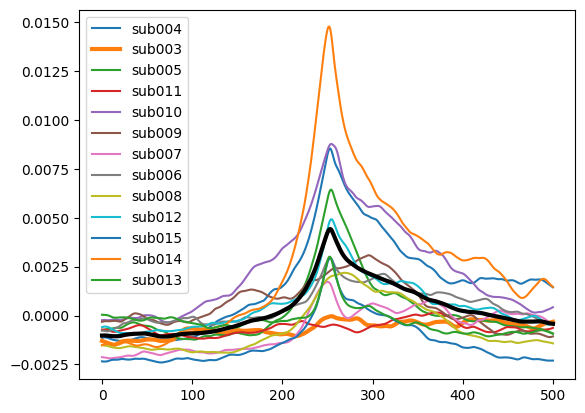

In [2]:

sensors_group = "occpar"
fn = f"dRSA_{sensors_group}_pixelwise_24Hz_rep1_gazedep1_gazerad250.mat"
root_dir = f"{paths['data_dir']}/results/results_Ingmar/50Hz_180stim_10sec_1000iter_0MNN/"
subjects = os.listdir(root_dir)
tot_rsas = []
for s in subjects:
    fn_sub = f"{root_dir}/{s}/{fn}"
    ingmar_drsa = loadmat(fn_sub)['dRSA'].ravel()
    tot_rsas.append(ingmar_drsa)
    if s != "sub003":
        plt.plot(ingmar_drsa, label=s)
    else:
        plt.plot(ingmar_drsa, label=s, linewidth=3)
plt.plot(np.mean(tot_rsas, axis=0), color='k', linewidth=3);
plt.legend();
